**$H_3$ Molecule with Density Functional Theory Initialization:**

In [ ]:
pip install pennylane --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.9 MB/s eta 0:00:00


In [ ]:
pip install geometric --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
pip install --upgrade pyscf --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 MB 16.1 MB/s eta 0:00:00


# Initial Geometry Density Functional Theory Calculations

I found the initial coordinates considering the molecular geometry is an equilateral triangle (every angle is 60 degrees) with side length = $0.88 Å$.

Then I use Density Functional Theory instead of Hartree Fock because it considers electron correlations unlike Hartree Fock.

Specifically, I used Restricted Kohn-Sham (RKS) since RKS is used for closed-shell systems.

$H_3+$ has 2 electrons (even number of electrons then no unpaired electrons, singlet state, spin = 0).

In [ ]:
from pyscf import gto, scf, dft
from pyscf.geomopt import geometric_solver  # Internal optimizer
from pyscf.geomopt.geometric_solver import optimize


# Defining initial geometry
# Equilateral triangle geometry for H3+ (side length = 0.88 Å) (in Å)
mol = gto.M(
    atom='''
    H  0.000   0.000   0.0
    H  0.000   0.880   0.0
    H  0.440   0.762   0.0  # x=0.88*cos(60°), y=0.88*sin(60°)
    ''',
    basis='sto-3g',
    charge=1,  # H3+ has +1 charge
    unit='angstrom',
    spin=0 )  # for closed-shell H3+

# Use RKS (DFT) with PBE functional
mf = dft.RKS(mol)
mf.xc = 'PBE'
mf.kernel()
print("Initial DFT (PBE) energy:", mf.e_tot)

# Optimize geometry
mol_optimized = geometric_solver.optimize(mf)
print("Optimized coordinates (Bohr):", mol_optimized.atom_coords())

# Re-run DFT on optimized geometry
mf_optimized = dft.RKS(mol_optimized)
mf_optimized.xc = 'PBE'
mf_optimized.kernel()
print("Optimized DFT energy:", mf_optimized.e_tot)

converged SCF energy = -1.05082471630247


geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-81de2946-780b-4e81-8d09-4044ee4f9887.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    

Initial DFT (PBE) energy: -1.0508247163024684


>  Max-Disp  < 1.80e-03
> === End Optimization Info ===



Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.880000   0.000000    0.000000  0.000000  0.000000
   H   0.440000   0.762000   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -1.0508247161898
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0285678301     0.1065728035     0.0000000000
1 H     0.7977144269    -0.2710310283     0.0000000000
2 H    -0.8262822838     0.1644582242     0.0000000000
----------------------------------------------
cycle 1: E = -1.05082471619  dE = -1.05082  norm(grad) = 1.19657


Step    0 : Gradient = 6.908e-01/8.425e-01 (rms/max) Energy = -1.0508247162
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.00000e-01 8.70211e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.009484  -0.035389  -0.000000   -0.009484 -0.035389 -0.000000
   H  -0.109121   0.928230  -0.000000   -0.109121  0.048230 -0.000000
   H   0.558605   0.749160  -0.000000    0.118605 -0.012840 -0.000000
converged SCF energy = -1.25126573448255
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0081906374     0.0305198359     0.0000000000
1 H     0.1720969586    -0.0624948129     0.0000000000
2 H    -0.1802875770     0.0319750026     0.0000000000
----------------------------------------------
cycle 2: E = -1.25126573448  dE = -0.200441  norm(grad) = 0.260859


Step    1 : Displace = 9.968e-02/1.193e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.506e-01/1.831e-01 (rms/max) E (change) = -1.2512657345 (-2.004e-01) Quality = 0.799
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.03104e-01 9.64288e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.021522  -0.080245   0.000000   -0.012039 -0.044856  0.000000
   H  -0.135661   0.959354   0.000000   -0.026541  0.031125  0.000000
   H   0.597183   0.762890   0.000000    0.038578  0.013730  0.000000
converged SCF energy = -1.2707629197491
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H    -0.0012113514    -0.0045324211     0.0000000000
1 H     0.1002770582    -0.0244498710     0.0000000000
2 H    -0.0990657073     0.0289823381    -0.0000000000
----------------------------------------------
cycle 3: E = -1.27076291975  dE = -0.0194972  norm(grad) = 0.146045


Step    2 : Displace = 4.284e-02/4.644e-02 (rms/max) Trust = 1.414e-01 (+) Grad = 8.432e-02/1.032e-01 (rms/max) E (change) = -1.2707629197 (-1.950e-02) Quality = 1.428
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.33488e-01 4.01541e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.017522  -0.065214  -0.000000    0.004000  0.015031 -0.000000
   H  -0.185292   0.964560   0.000000   -0.049630  0.005206  0.000000
   H   0.642812   0.742650   0.000000    0.045630 -0.020240  0.000000
converged SCF energy = -1.28400894763372
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H    -0.0024890149    -0.0092744068    -0.0000000000
1 H     0.0409991016    -0.0060193974     0.0000000000
2 H    -0.0385100611     0.0152938064     0.0000000000
----------------------------------------------
cycle 4: E = -1.28400894763  dE = -0.013246  norm(grad) = 0.0593826


Step    3 : Displace = 4.173e-02/4.992e-02 (rms/max) Trust = 2.000e-01 (+) Grad = 3.428e-02/4.144e-02 (rms/max) E (change) = -1.2840089476 (-1.325e-02) Quality = 1.358
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 9.99999e-02 1.20883e-01 2.59643e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.010503  -0.038962  -0.000000    0.007019  0.026252 -0.000000
   H  -0.222184   0.960359   0.000000   -0.036892 -0.004201  0.000000
   H   0.672683   0.720597   0.000000    0.029871 -0.022053 -0.000000
converged SCF energy = -1.28824948415098
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H    -0.0013899529    -0.0051536760    -0.0000000000
1 H     0.0167398784    -0.0017304000     0.0000000000
2 H    -0.0153499030     0.0068840307     0.0000000000
----------------------------------------------
cycle 5: E = -1.28824948415  dE = -0.00424054  norm(grad) = 0.0243869


Step    4 : Displace = 3.414e-02/3.713e-02 (rms/max) Trust = 2.828e-01 (+) Grad = 1.408e-02/1.683e-02 (rms/max) E (change) = -1.2882494842 (-4.241e-03) Quality = 1.374
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 8.78276e-02 1.00000e-01 2.09138e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.004884  -0.018006  -0.000000    0.005619  0.020956  0.000000
   H  -0.247758   0.956000   0.000000   -0.025574 -0.004359  0.000000
   H   0.692636   0.704002   0.000000    0.019953 -0.016596  0.000000
converged SCF energy = -1.28939492502539
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H    -0.0001671787    -0.0005973159     0.0000000000
1 H     0.0054424138    -0.0011437198     0.0000000000
2 H    -0.0052752567     0.0017410518     0.0000000000
----------------------------------------------
cycle 6: E = -1.28939492503  dE = -0.00114544  norm(grad) = 0.00788494


Step    5 : Displace = 2.461e-02/2.595e-02 (rms/max) Trust = 3.000e-01 (+) Grad = 4.552e-03/5.561e-03 (rms/max) E (change) = -1.2893949250 (-1.145e-03) Quality = 1.258
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 6.91290e-02 1.00000e-01 1.88826e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.003032  -0.011136  -0.000000    0.001852  0.006871 -0.000000
   H  -0.258441   0.955205   0.000000   -0.010683 -0.000796  0.000000
   H   0.701467   0.697926   0.000000    0.008831 -0.006075 -0.000000
converged SCF energy = -1.28952821254851
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000687206     0.0002636925    -0.0000000000
1 H     0.0012523378    -0.0004784095    -0.0000000000
2 H    -0.0013210826     0.0002147404    -0.0000000000
----------------------------------------------
cycle 7: E = -1.28952821255  dE = -0.000133288  norm(grad) = 0.00191386


Step    6 : Displace = 9.666e-03/1.072e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.105e-03/1.341e-03 (rms/max) E (change) = -1.2895282125 (-1.333e-04) Quality = 1.184
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 6.03298e-02 1.00000e-01 1.72923e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.002747  -0.010087  -0.000000    0.000285  0.001049  0.000000
   H  -0.261141   0.955374   0.000000   -0.002701  0.000169  0.000000
   H   0.703883   0.696708   0.000000    0.002416 -0.001219  0.000000
converged SCF energy = -1.28953501775324
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000225049     0.0000844735    -0.0000000000
1 H     0.0001256674    -0.0000790395     0.0000000000
2 H    -0.0001481952    -0.0000054113     0.0000000000
----------------------------------------------
cycle 8: E = -1.28953501775  dE = -6.8052e-06  norm(grad) = 0.000227317


Step    7 : Displace = 2.297e-03/2.708e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 1.312e-04/1.485e-04 (rms/max) E (change) = -1.2895350178 (-6.805e-06) Quality = 1.087
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.86915e-02 1.00000e-01 1.61420e-01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.002747  -0.010092  -0.000000   -0.000001 -0.000004  0.000000
   H  -0.261387   0.955442   0.000000   -0.000245  0.000068  0.000000
   H   0.704130   0.696643   0.000000    0.000247 -0.000065 -0.000000
converged SCF energy = -1.28953508934458
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000030743     0.0000114443    -0.0000000000
1 H     0.0000037745    -0.0000071234     0.0000000000
2 H    -0.0000068715    -0.0000042981     0.0000000000
----------------------------------------------
cycle 9: E = -1.28953508934  dE = -7.15913e-08  norm(grad) = 1.64653e-05


Step    8 : Displace = 2.082e-04/2.552e-04 (rms/max) Trust = 3.000e-01 (=) Grad = 9.506e-06/1.185e-05 (rms/max) E (change) = -1.2895350893 (-7.159e-08) Quality = 1.040
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.86915e-02 1.00000e-01 1.61420e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 8.923 seconds


Optimized coordinates (Bohr): [[-5.19115746e-03 -1.90702567e-02 -3.78256033e-15]
 [-4.93949236e-01  1.80552375e+00  4.29618735e-15]
 [ 1.33061340e+00  1.31646428e+00  3.99631411e-15]]
converged SCF energy = -1.28953508944898
Optimized DFT energy: -1.2895350894489763


`mol.atom_coords()` always returns coordinates in atomic units (Bohr).

In [ ]:
print(f"Optimized coordinates (Bohr):\n {mol_optimized.atom_coords()}")
print("Optimized DFT energy:", mf_optimized.e_tot)

Optimized coordinates (Bohr):
 [[-5.19115746e-03 -1.90702567e-02 -3.78256033e-15]
 [-4.93949236e-01  1.80552375e+00  4.29618735e-15]
 [ 1.33061340e+00  1.31646428e+00  3.99631411e-15]]
Optimized DFT energy: -1.2895350894489763


# Step 2

In [ ]:
import jax
from jax import numpy as jnp

jax.config.update("jax_enable_x64", True)

symbols = ["H", "H", "H"]

x = jnp.array([[-5.19115746e-03, -1.90702567e-02, -3.78256033e-15],
               [-4.93949236e-01,  1.80552375e+00,  4.29618735e-15],
               [ 1.33061340e+00,  1.31646428e+00,  3.99631411e-15]]) #Bohr

In [ ]:
import pennylane as qml


def H(x):
    molecule = qml.qchem.Molecule(symbols, x, charge=1)
    return qml.qchem.molecular_hamiltonian(molecule)[0]

In [ ]:
hf = qml.qchem.hf_state(electrons=2, orbitals=6)
print(hf)

[1 1 0 0 0 0]


In [ ]:
num_wires = 6
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev, interface="jax")
def circuit(params, obs, wires):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])
    qml.DoubleExcitation(params[1], wires=[0, 1, 4, 5])

    return qml.expval(obs)

In [ ]:
def cost(params, x):
    hamiltonian = H(x)
    return circuit(params, obs=hamiltonian, wires=range(num_wires))

In [ ]:
def finite_diff(f, x, delta=0.01):
    """Compute the central-difference finite difference of a function"""
    gradient = []
    x = jnp.ravel(x)

    for i in range(len(x)):
        shift = jnp.zeros_like(x)
        shift = shift.at[i].set(0.5*delta)
        res = (f(x + shift) - f(x - shift)) * delta**-1
        gradient.append(res)

    return gradient


def grad_x(params, x):
    grad_h = finite_diff(H, x)
    grad = [circuit(params, obs=obs, wires=range(num_wires)) for obs in grad_h]
    return jnp.array(grad).reshape(x.shape)

In [ ]:
theta = jnp.array([0.0, 0.0])

In [ ]:
# store the values of the cost function
energies = []

# store the values of the bond length
bond_length = []

# Factor to convert from Bohrs to Angstroms
bohr_angs = 0.529177210903

for n in range(36):
    # gradient for params
    g_param = jax.grad(cost, argnums=[0])(theta, x)[0]
    theta = theta - 0.8 * g_param

    # gradient for coordinates
    value, _ = jax.value_and_grad(cost, argnums=1)(theta, x)
    grad = grad_x(theta, x)
    x = x - 0.8 * grad
    energies.append(value)
    bond_length.append(jnp.linalg.norm(x[0] - x[1]) * bohr_angs)

    if n % 4 == 0:
        print(f"Step = {n},  E = {energies[-1]:.8f} Ha,  bond length = {bond_length[-1]:.5f} A")

    # Check maximum component of the nuclear gradient
    if jnp.max(grad_x(theta, x)) <= 1e-04:
        break

print("\n" f"Final value of the ground-state energy = {energies[-1]:.8f} Ha")
print("\n" "Ground-state equilibrium geometry")
print("%s %4s %8s %8s" % ("symbol", "x", "y", "z"))
for i, atom in enumerate(symbols):
    print(f"  {atom}    {x[0][i]:.4f}   {x[1][i]:.4f}   {x[2][i]:.4f}")

Step = 0,  E = -1.26948000 Ha,  bond length = 0.98997 A
Step = 4,  E = -1.27443477 Ha,  bond length = 0.98513 A

Final value of the ground-state energy = -1.27443477 Ha

Ground-state equilibrium geometry
symbol    x        y        z
  H    -0.0011   -0.4828   1.3154
  H    -0.0039   1.7944   1.3124
  H    0.0000   -0.0000   -0.0000


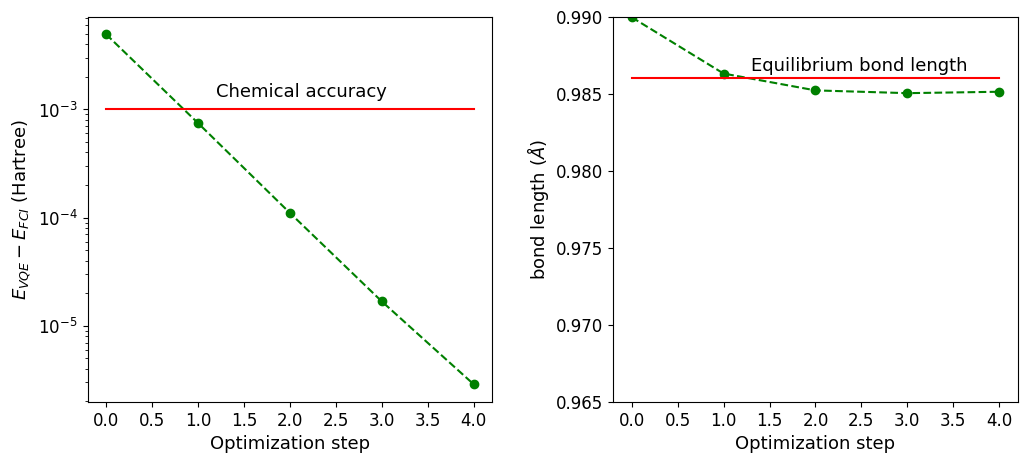

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# Add energy plot on column 1
E_fci = -1.27443765658
E_vqe = jnp.array(energies)
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 1), E_vqe - E_fci, "go", ls="dashed")
ax1.plot(range(n + 1), jnp.full(n + 1, 0.001), color="red")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("$E_{VQE} - E_{FCI}$ (Hartree)", fontsize=13)
ax1.text(1.2, 0.0013, r"Chemical accuracy", fontsize=13)
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add bond length plot on column 2
d_fci = 0.986
ax2 = fig.add_subplot(122)
ax2.plot(range(n + 1), bond_length, "go", ls="dashed")
ax2.plot(range(n + 1), jnp.full(n + 1, d_fci), color="red")
ax2.set_ylim([0.965, 0.99])
ax2.set_xlabel("Optimization step", fontsize=13)
ax2.set_ylabel("bond length ($\AA$)", fontsize=13)
ax2.text(1.3, 0.9865, r"Equilibrium bond length", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.show()

As we can see, using DFT to find initial coordinates results in faster optimization than the HF version, with good results at the first optimization step.